# LINEAR REGRESSION MODELS

## CONTENTS

__1.LIBRARIES AND DATA__
    
_Importing Necessary tools for data science and dataset_
        
__2.FIRST RUN__

_Running a MLR model with all the predictors_

__3.FORWARD SELECTION__

_Reducing the number of predictors with the forward selection method and running a MLR model_

__4.BACKWARD ELIMINATION__

_Reducing the number of predictors with the backward elimination method and running a MLR model_

__5.STEPWISE SELECTION__

_Reducing the number of predictors with the stepwise selection method and running a MLR model_

__6.DEALING WITH POTENCIAL PROBLEMS__

    6.1.Checking for non-linearity of the data and heteroscedasticity
    6.2.Checking for collinearity
    
__7.DEALING WITH THE MULTICOLLINEARITY PROBLEM__

_Reducing the number of predictors by the VIF criterion_

__8.VIF MODEL__

_Running a MLR model with the reduced dataset by the VIF criterion_

__9.PCA MODELS__

_Applying PCA and running MLR models for different number of components_

__10.CONCLUSION__

_Comparing the crossvalidated results of the all the models_

## 1. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import decomposition

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from statsmodels.stats.outliers_influence import variance_inflation_factor  
from statsmodels.tools.tools import add_constant

pd.set_option('display.max_columns', 100)

__Importing Data__

In [2]:
cancer_df = pd.read_csv(r'C:\Users\Constantine\OneDrive\Υπολογιστής\projects\Predicting Death Rate From Cancer\cancer_reg_refined.csv',
                 encoding='latin-1') 
cancer_df.head(2)

# Without the encoding paremeter, this error presents itself: UnicodeDecodeError: 'utf-8' codec can't decode 
# byte 0xf1 in position 41137: invalid continuation byte

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,93564.75,39.3,36.9,41.7,WEST,2.54,52.5,11.5,39.5,6.9,23.2,19.6,51.9,8.0,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,49534.00,33.0,32.2,33.7,WEST,2.34,44.5,6.1,22.4,7.5,26.0,22.7,55.9,7.8,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


In [3]:
# Copying and shuffling the original Dataframe
df1 = cancer_df.sample(frac = 1) 

## 2. FIRST RUN

In [4]:
# Getting Dummy variables
df1 = pd.get_dummies(data = df1, drop_first = True)
df1.head(2) 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
2021,81.0,32,133.7,345.3,45078,23506,15.6,0.0,43962.70,31.7,30.9,33.2,2.96,60.1,18.5,41.3,1.8,26.9,12.5,59.3,5.7,61.6,40.5,29.7,16.9,92.314605,0.188284,0.342334,5.122170,61.756337,8.097815,0,1
880,45.0,13,102.1,320.8,59181,13909,11.3,0.0,58020.05,38.5,40.2,36.1,2.82,42.2,7.7,37.1,25.0,16.8,23.1,61.1,13.4,56.7,36.3,29.7,17.3,84.080305,0.551393,1.095716,8.772798,47.187118,1.991311,0,1


In [5]:
# Defining X and Y
Y1 = df1['TARGET_deathRate']
X1 = df1.drop('TARGET_deathRate', axis = 1)
X1.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
2021,81.0,32,345.3,45078,23506,15.6,0.0,43962.70,31.7,30.9,33.2,2.96,60.1,18.5,41.3,1.8,26.9,12.5,59.3,5.7,61.6,40.5,29.7,16.9,92.314605,0.188284,0.342334,5.122170,61.756337,8.097815,0,1
880,45.0,13,320.8,59181,13909,11.3,0.0,58020.05,38.5,40.2,36.1,2.82,42.2,7.7,37.1,25.0,16.8,23.1,61.1,13.4,56.7,36.3,29.7,17.3,84.080305,0.551393,1.095716,8.772798,47.187118,1.991311,0,1


In [6]:
# Using the RepeatedKFold function for cross-validation
rkf = RepeatedKFold(n_splits= 5, n_repeats= 10, random_state= 126) 

In [7]:
# Creating function that calculates cross-validated scores

def cv_scores(X,Y):
        
    cv_MAE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                       scoring='neg_mean_absolute_error', error_score='raise') * (-1)),3)

    cv_MSE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)
    
    cv_MAPE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='neg_mean_absolute_percentage_error', error_score='raise') * (-100)),3)
    
    cv_R2 = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='r2', error_score='raise')),3)
    
    cv_F_stat = round(((cv_R2)/(1-cv_R2))*((len(X) - len(X.columns) - 1 )/len(X.columns)),2)
    
    score_list = [cv_MAE, cv_MSE,cv_MAPE,cv_R2,cv_F_stat, len(X.columns)]
    return score_list

In [8]:
# Storing the cross-validated scores

CV_RESULTS = pd.DataFrame({'First Run':cv_scores(X1,Y1)}, index=['MAE','MSE', 'MAPE','R^2','F-stat', 'N_Preds'])
CV_RESULTS

,First Run
MAE,14.192
MSE,368.600
MAPE,8.203
R^2,0.516
F-stat,88.190
N_Preds,32.000


## 3. FORWARD SELECTION

Using the forward selection method to decide on important variables

In [9]:
# Defining forward selection function

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [10]:
forward_selection(X1,Y1) 

['PctBachDeg25_Over',
 'incidenceRate',
 'povertyPercent',
 'Geography_WEST',
 'PctHS18_24',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctOtherRace',
 'PctEmpPrivCoverage',
 'BirthRate',
 'PctMarriedHouseholds',
 'avgAnnCount',
 'PctBlack',
 'MedianAgeFemale',
 'PctEmployed16_Over',
 'PercentMarried',
 'PctWhite']

In [11]:
# Defining X and Y
Y2 = Y1
X2 = X1[forward_selection(X1,Y1)]

In [12]:
# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'Forward Selection':cv_scores(X2,Y2)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection
MAE,14.192,14.230
MSE,368.600,371.200
MAPE,8.203,8.228
R^2,0.516,0.513
F-stat,88.190,164.950
N_Preds,32.000,17.000


## 4. BACKWARD ELIMINATION

Using the backward elimination method to decide on important variables

In [13]:
# Defining backward elimination function
def backward_elimination(data, target,significance_level = 0.01):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [14]:
backward_elimination(X1,Y1)

['avgAnnCount',
 'avgDeathsPerYear',
 'incidenceRate',
 'popEst2015',
 'MedianAge',
 'PercentMarried',
 'PctHS18_24',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctWhite',
 'PctBlack',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'Geography_WEST']

In [15]:
# Defining X and Y
Y3 = Y1
X3 = X1[forward_selection(X1,Y1)]

In [16]:
# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'Backward Elimination':cv_scores(X3,Y3)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination
MAE,14.192,14.230,14.230
MSE,368.600,371.200,371.200
MAPE,8.203,8.228,8.228
R^2,0.516,0.513,0.513
F-stat,88.190,164.950,164.950
N_Preds,32.000,17.000,17.000


## 5. STEPWISE SELECTION

Using the stepwise selection method to decide on important variables

In [17]:
# Defining the stepwise selection function

def stepwise_selection(data, target,SL_in=0.01,SL_out = 0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [18]:
stepwise_selection(X1,Y1)

['PctBachDeg25_Over',
 'incidenceRate',
 'Geography_WEST',
 'PctHS18_24',
 'PctPrivateCoverage',
 'PctOtherRace',
 'PctEmpPrivCoverage',
 'PctMarriedHouseholds',
 'avgAnnCount',
 'PctEmployed16_Over',
 'MedianAgeFemale',
 'PercentMarried',
 'BirthRate',
 'avgDeathsPerYear',
 'popEst2015']

In [19]:
# Defining X and Y
Y4 = Y1
X4 = X1[forward_selection(X1,Y1)]

In [20]:
# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'Stepwise Selection':cv_scores(X4,Y4)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection
MAE,14.192,14.230,14.230,14.230
MSE,368.600,371.200,371.200,371.200
MAPE,8.203,8.228,8.228,8.228
R^2,0.516,0.513,0.513,0.513
F-stat,88.190,164.950,164.950,164.950
N_Preds,32.000,17.000,17.000,17.000


## 6. DEALING WITH POTENCIAL PROBLEMS

__6.1 Checking for non-linearity of the data and heteroscedasticity__

In [21]:
# Running a linear regression model to get the residuals 

x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 126 )

MLR_first_run = sm.OLS(y_train, x_train).fit()

predictions = MLR_first_run.predict(x_test)

residuals = y_test-predictions

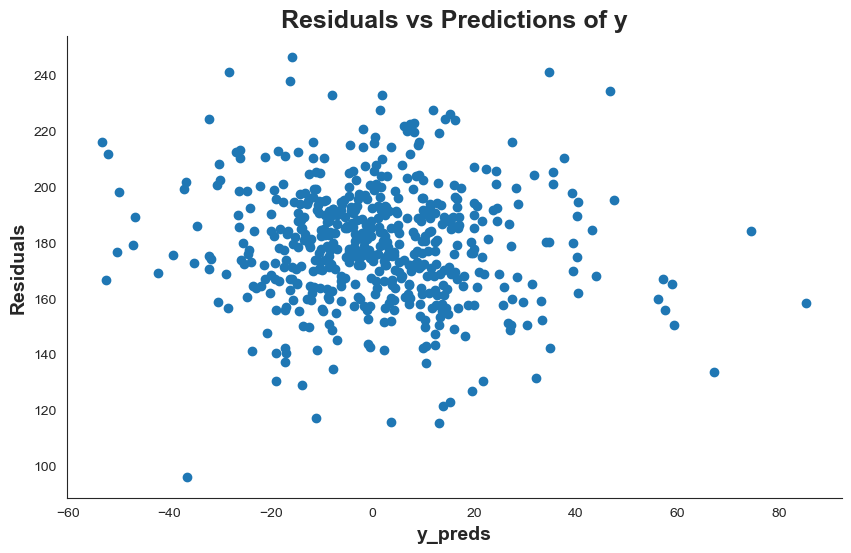

In [22]:
# Plotting Residuals vs y_preds
sns.set_style('white')
plt.figure(figsize = (10,6))
plt.scatter(residuals,predictions)

plt.title('Residuals vs Predictions of y' , fontsize = 18, weight = 'bold')
plt.xlabel('y_preds',fontsize = 14, weight = 'bold')
plt.ylabel('Residuals',fontsize = 14, weight = 'bold')
sns.despine()

plt.show()

Since there is no presence of any pattern in the residual-prediction plot, there is no indication of non-linearity in the data.
Additionally, it looks like the variance of the error terms is constant.

__6.2 Checking for collinearity__

In [23]:
# Dividing the dataset to numeric and categorical

df1_num = df1.drop(columns = ['Geography_EAST', 'Geography_WEST'])
df1_cat = df1[['Geography_EAST', 'Geography_WEST']]

In [24]:
df1_num

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
2021,81.0,32,133.7,345.3,45078,23506,15.6,0.000000,43962.70,31.7,30.9,33.2,2.96,60.1,18.5,41.3,1.8,26.9,12.5,59.3,5.7,61.6,40.5,29.7,16.9,92.314605,0.188284,0.342334,5.122170,61.756337,8.097815
880,45.0,13,102.1,320.8,59181,13909,11.3,0.000000,58020.05,38.5,40.2,36.1,2.82,42.2,7.7,37.1,25.0,16.8,23.1,61.1,13.4,56.7,36.3,29.7,17.3,84.080305,0.551393,1.095716,8.772798,47.187118,1.991311
927,233.0,69,129.3,415.5,60658,54688,10.7,749.707431,58020.05,38.8,37.6,40.0,2.38,51.0,9.2,23.4,10.1,19.4,27.3,63.7,5.2,70.6,42.7,25.0,12.7,88.575082,0.379828,0.716408,2.372983,49.658346,5.222637
2038,245.0,102,180.1,466.9,46214,40048,14.6,449.460647,46611.30,41.6,39.0,43.7,2.40,50.4,8.9,33.8,6.8,30.7,16.7,58.1,6.1,69.8,44.4,34.3,14.9,89.753387,0.392167,1.008070,0.253903,48.726392,6.338028
88,454.0,177,163.4,440.9,48102,102105,14.4,675.774938,49534.00,33.8,33.0,34.7,2.43,46.4,6.9,26.6,8.3,26.9,19.9,65.3,5.8,74.8,54.2,29.4,14.6,92.751849,0.737552,3.447833,0.233015,46.895445,4.346348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,120.0,70,266.7,460.1,28647,24620,35.0,0.000000,28429.05,33.5,31.0,35.2,2.62,31.4,16.3,23.6,3.1,27.6,12.6,46.2,20.3,42.7,27.8,49.9,34.6,22.610280,75.896888,0.566247,0.134632,29.764957,6.156511
1302,30.0,13,174.4,445.9,49774,4523,12.3,0.000000,49534.00,44.2,44.3,44.1,2.26,60.7,19.3,41.5,1.3,36.0,17.9,58.7,3.6,74.8,40.3,33.1,13.7,90.059774,0.376356,0.199247,2.324552,53.556911,5.275498
2595,51.0,20,181.2,487.2,54154,6906,11.7,0.000000,52796.00,46.4,44.8,47.4,2.36,59.4,16.6,43.5,5.2,36.4,15.6,60.4,3.7,70.9,40.2,39.1,18.3,96.819589,0.295525,0.000000,0.844357,56.499661,6.004619
981,39.0,18,163.1,387.6,53828,7290,12.1,411.522634,52796.00,45.2,44.1,46.2,2.45,59.5,19.6,40.5,6.9,43.0,12.2,60.8,4.6,70.5,45.1,34.7,15.7,98.114487,0.352686,0.244167,0.203473,58.937035,6.083916


In [25]:
df1_cat

,Geography_EAST,Geography_WEST
2021,0,1
880,0,1
927,0,1
2038,0,1
88,0,0
...,...,...
2220,1,0
1302,0,0
2595,0,0
981,0,0


In [26]:
# Function that displays correlation matrix

def display_corr(dataframe):
    sns.set(rc = {'figure.figsize':(35,15)})
    sns.heatmap(data = dataframe.corr(),
          annot = True,
         fmt = '.2g',
         center = 0,
          cmap = 'coolwarm',
          linewidths = 1, linecolor = 'black')

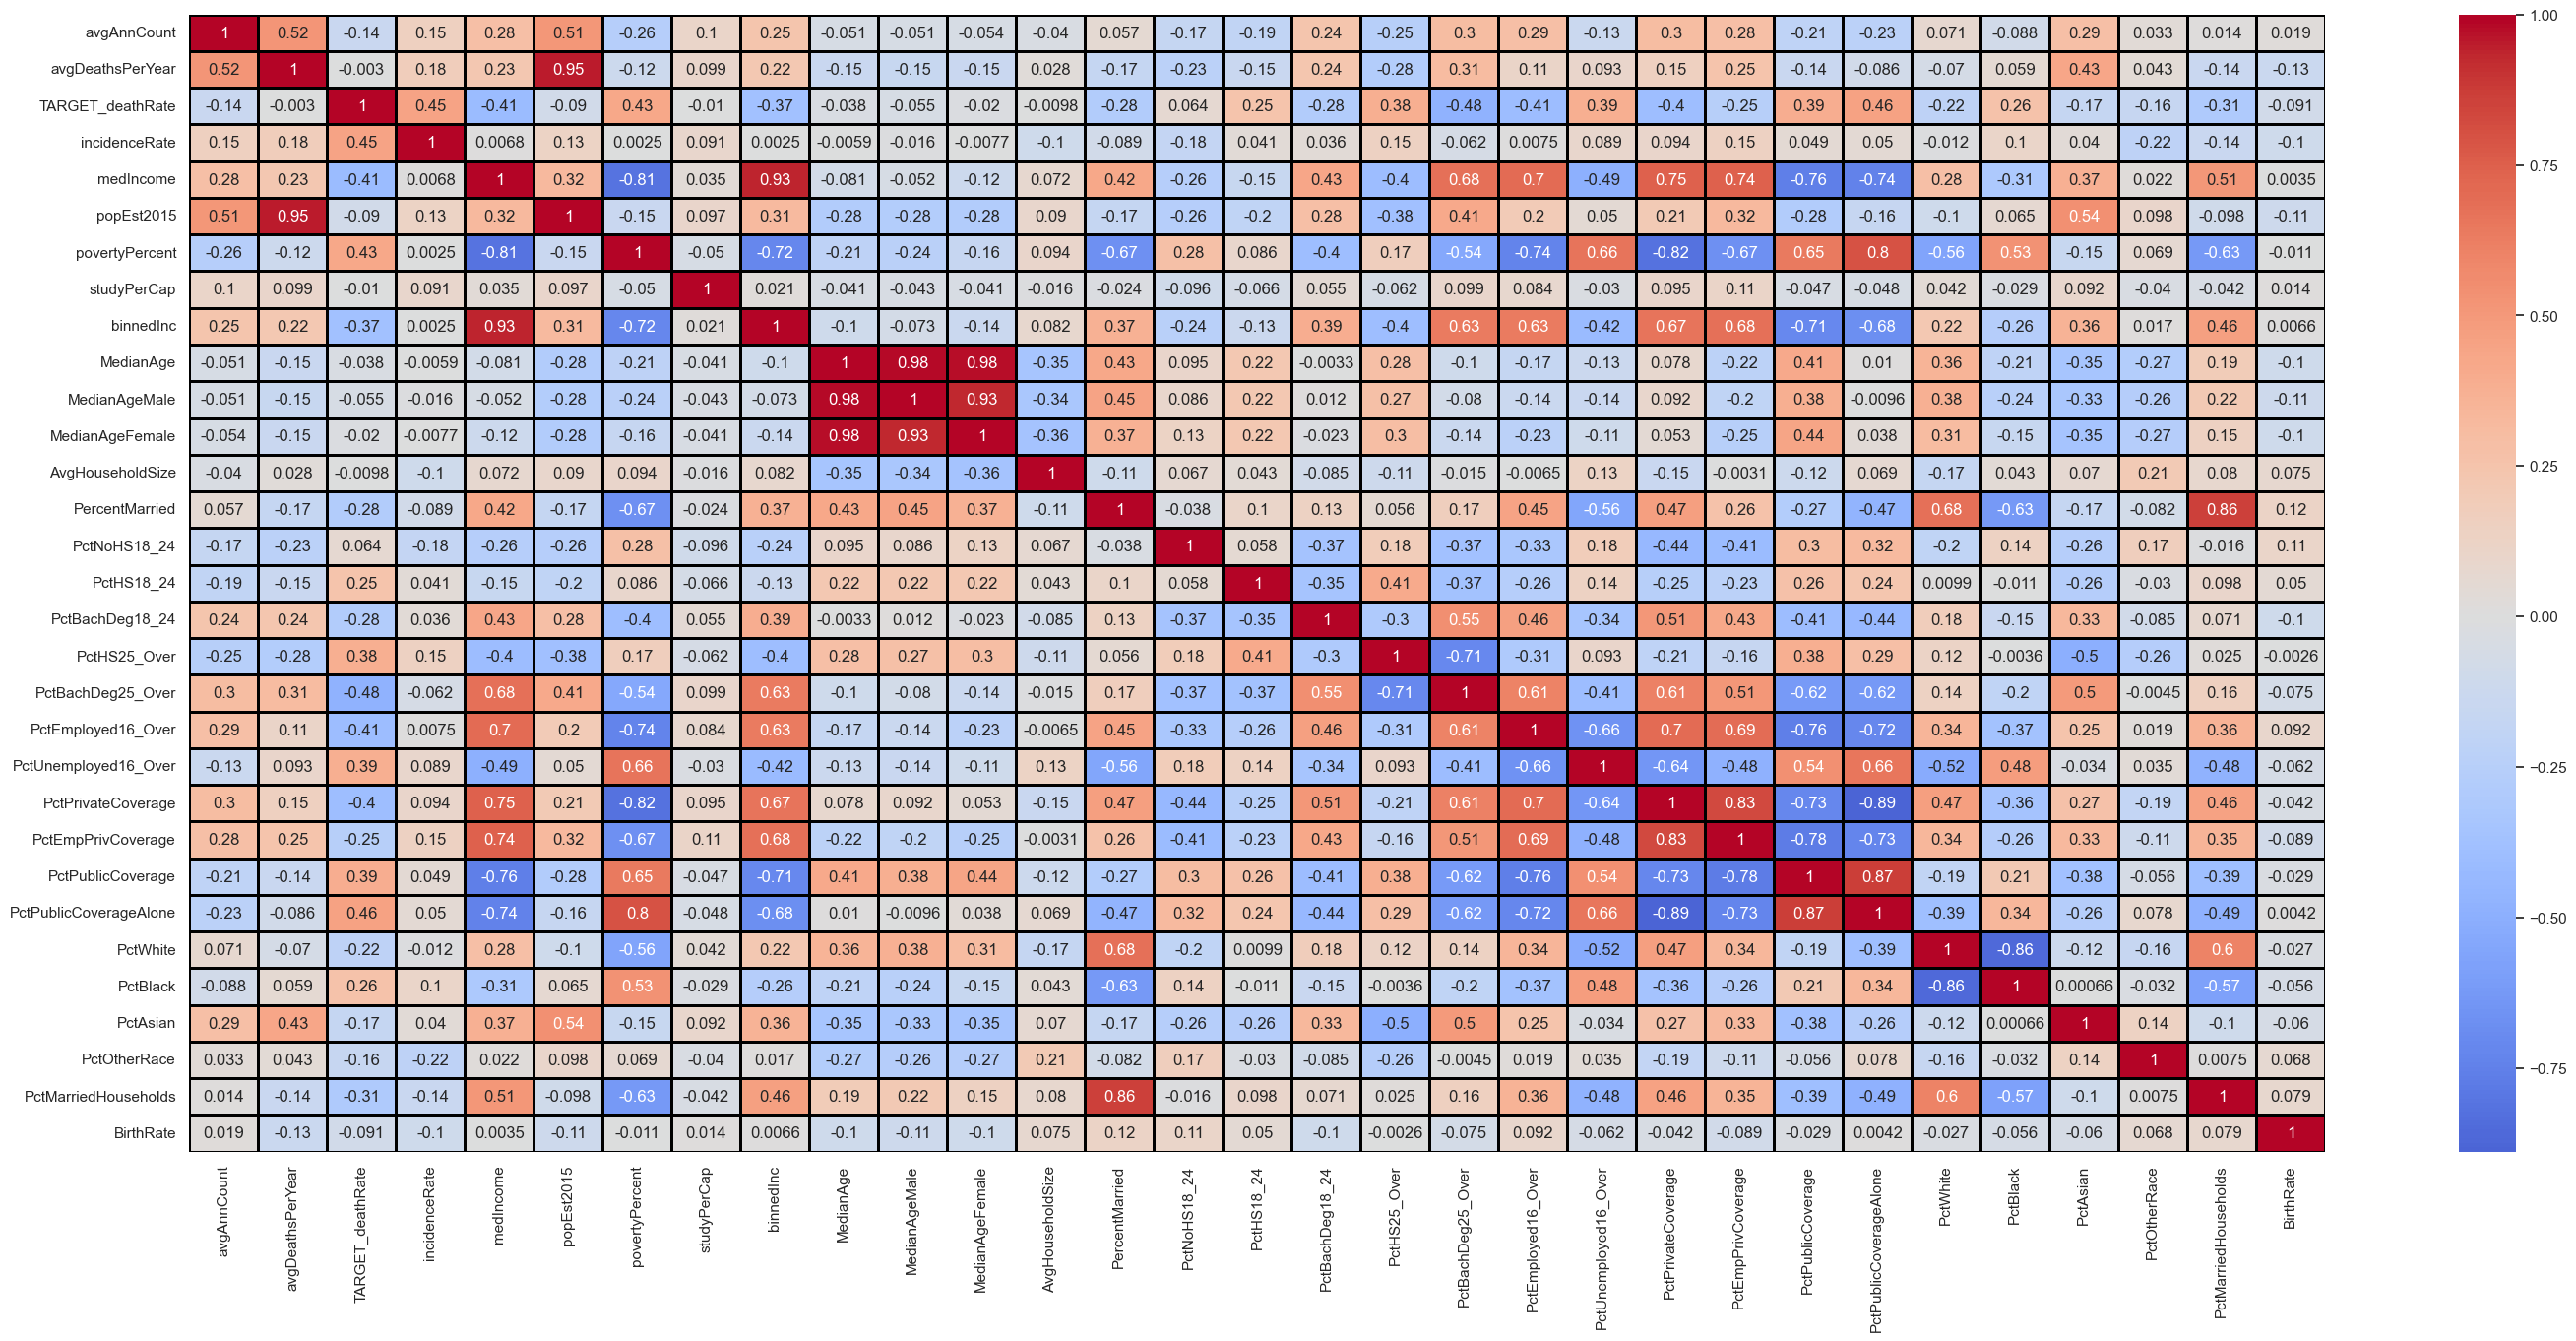

In [27]:
display_corr(df1_num)

There are some of the variables that are strongly correlated (negatively or positively).
Maybe it is best to check for Multicollinearity with the help of Variance Inflation Factor.

In [28]:
# Piece of code that calculates VIF
X = add_constant(df1_num)  
ds = pd.Series([variance_inflation_factor(X.values, i)
                for i in range(X.shape[1])],   
                  index=X.columns)  
print(ds)

const                     2153.731044
avgAnnCount                  1.603261
avgDeathsPerYear            15.369149
TARGET_deathRate             2.073874
incidenceRate                1.570300
medIncome                   15.748860
popEst2015                  17.365151
povertyPercent               9.292627
studyPerCap                  1.051218
binnedInc                    8.169919
MedianAge                  246.448005
MedianAgeMale               84.166684
MedianAgeFemale             62.786982
AvgHouseholdSize             1.332611
PercentMarried              11.593609
PctNoHS18_24                 1.706965
PctHS18_24                   1.613350
PctBachDeg18_24              1.788739
PctHS25_Over                 3.439891
PctBachDeg25_Over            5.319529
PctEmployed16_Over           6.978969
PctUnemployed16_Over         2.789097
PctPrivateCoverage          15.911249
PctEmpPrivCoverage           7.684182
PctPublicCoverage           24.596933
PctPublicCoverageAlone      23.510661
PctWhite    

The variables that have VIF value greater than 10 (this is a general "rule of thumb") are probably collinear with at least one other variable.

## 7. Dealing with the Multicollinearity Problem

We are going to create a loop that runs while the max VIF is greater than 10. In the loop, the VIF of every variable will be calculated, than if the max VIF is greater than 10, this variable will be erased from the numeric dataset. The loop will run while max(VIF) > 10.

In [29]:
# Erasing the previously created  constant
ds.drop(labels = 'const', axis = 0, inplace = True)
ds 

avgAnnCount                 1.603261
avgDeathsPerYear           15.369149
TARGET_deathRate            2.073874
incidenceRate               1.570300
medIncome                  15.748860
popEst2015                 17.365151
povertyPercent              9.292627
studyPerCap                 1.051218
binnedInc                   8.169919
MedianAge                 246.448005
MedianAgeMale              84.166684
MedianAgeFemale            62.786982
AvgHouseholdSize            1.332611
PercentMarried             11.593609
PctNoHS18_24                1.706965
PctHS18_24                  1.613350
PctBachDeg18_24             1.788739
PctHS25_Over                3.439891
PctBachDeg25_Over           5.319529
PctEmployed16_Over          6.978969
PctUnemployed16_Over        2.789097
PctPrivateCoverage         15.911249
PctEmpPrivCoverage          7.684182
PctPublicCoverage          24.596933
PctPublicCoverageAlone     23.510661
PctWhite                    6.843428
PctBlack                    5.476204
P

In [30]:
# Storing the dependent variable so it will not be erased by the loop
dependent_variable = df1_num.TARGET_deathRate  

In [31]:
# Running the loop

while ds.max() > 10:
    X = add_constant(df1_num)  
    ds = pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)
    ds.drop(labels = 'const', axis = 0, inplace = True)
    column_to_be_removed = ds.idxmax()
    del df1_num[column_to_be_removed]
    ds.drop(labels = ds.idxmax(),axis = 0, inplace = True)

print(ds)

avgAnnCount               1.567512
avgDeathsPerYear          1.840495
TARGET_deathRate          2.026655
incidenceRate             1.521965
povertyPercent            7.516323
studyPerCap               1.047620
binnedInc                 3.787129
MedianAgeMale             9.248476
MedianAgeFemale           9.312191
AvgHouseholdSize          1.320139
PctNoHS18_24              1.523163
PctHS18_24                1.532007
PctBachDeg18_24           1.744412
PctHS25_Over              3.354658
PctBachDeg25_Over         4.958226
PctEmployed16_Over        6.178426
PctUnemployed16_Over      2.714860
PctEmpPrivCoverage        4.675545
PctPublicCoverageAlone    4.578648
PctWhite                  6.675478
PctBlack                  5.269536
PctAsian                  1.865543
PctOtherRace              1.456330
PctMarriedHouseholds      8.398227
BirthRate                 1.185930
dtype: float64


In [32]:
# Adding the dependent variable to the numeric dataset
df1_num['TARGET_deathRate'] = dependent_variable 

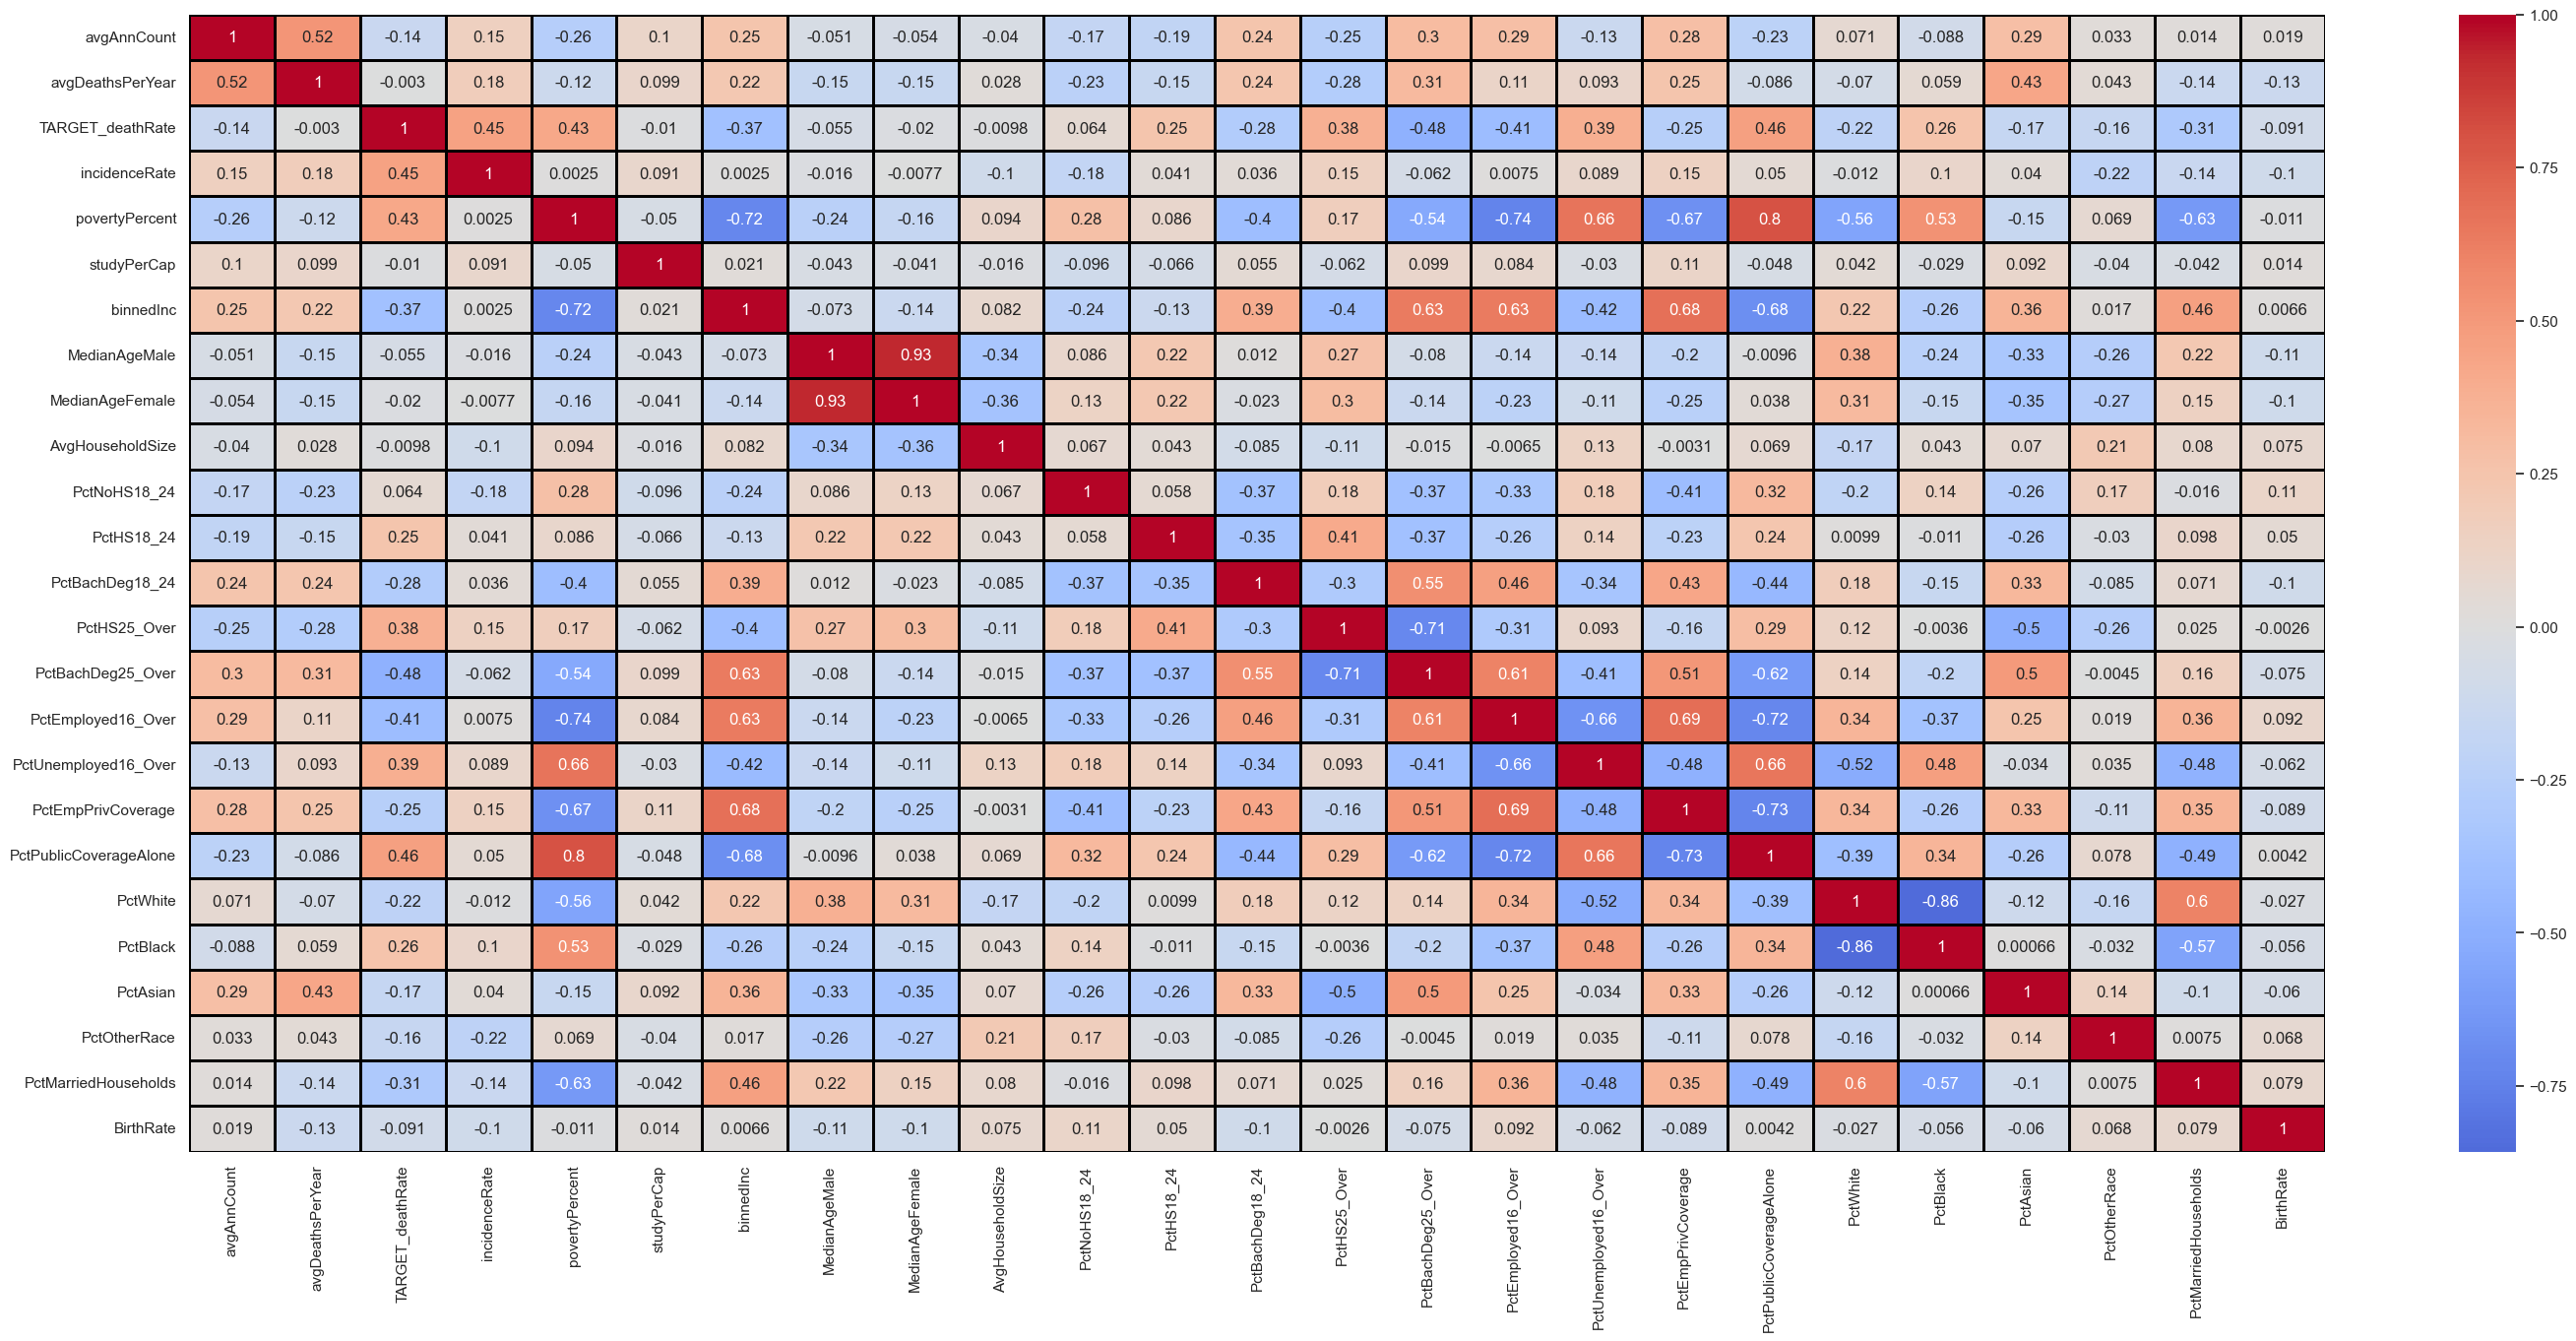

In [33]:
# Creating a heatmap to detect if there is any high correlation between the independent variables.
display_corr(df1_num) 

There are still some variables that are highly correlated.

In [34]:
# Concatenating the previously divided dataset
df1_vif = pd.concat([df1_num.round(3), df1_cat], axis =  1)
df1_vif.head(2) 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctEmpPrivCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
2021,81.0,32,133.7,345.3,15.6,0.0,43962.70,30.9,33.2,2.96,18.5,41.3,1.8,26.9,12.5,59.3,5.7,40.5,16.9,92.315,0.188,0.342,5.122,61.756,8.098,0,1
880,45.0,13,102.1,320.8,11.3,0.0,58020.05,40.2,36.1,2.82,7.7,37.1,25.0,16.8,23.1,61.1,13.4,36.3,17.3,84.080,0.551,1.096,8.773,47.187,1.991,0,1


In [35]:
# Checking the column names
df1_vif.columns 

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAgeMale',
       'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctEmpPrivCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Geography_EAST',
       'Geography_WEST'],
      dtype='object')

## 8. VIF MODEL

In [36]:
# Defining X and Y

Y_vif = df1_vif['TARGET_deathRate']
X_vif = df1_vif.drop('TARGET_deathRate', axis = 1)
X_vif.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,povertyPercent,studyPerCap,binnedInc,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctEmpPrivCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
2021,81.0,32,345.3,15.6,0.0,43962.70,30.9,33.2,2.96,18.5,41.3,1.8,26.9,12.5,59.3,5.7,40.5,16.9,92.315,0.188,0.342,5.122,61.756,8.098,0,1
880,45.0,13,320.8,11.3,0.0,58020.05,40.2,36.1,2.82,7.7,37.1,25.0,16.8,23.1,61.1,13.4,36.3,17.3,84.080,0.551,1.096,8.773,47.187,1.991,0,1


In [37]:
# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'VIF Model':cv_scores(X_vif,Y_vif)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection,VIF Model
MAE,14.192,14.230,14.230,14.230,14.466
MSE,368.600,371.200,371.200,371.200,381.200
MAPE,8.203,8.228,8.228,8.228,8.349
R^2,0.516,0.513,0.513,0.513,0.500
F-stat,88.190,164.950,164.950,164.950,102.040
N_Preds,32.000,17.000,17.000,17.000,26.000


## 9. PCA MODELS

We are going to extract the Principal Components of the dataset. A loop will be created to run 31 principal components linear regressions. For each model, we will store the number of components used and the mean absolute error. We will also get the explained variance ratio. Then we will compare the results.

In [38]:
# Running the loop
explained_variance = []
N_components = []
MAE_per_N_components = []

for i in range(1, 32):

    Y = df1['TARGET_deathRate']
    X = df1.drop('TARGET_deathRate', axis = 1)
    
    X = scale(X)
    
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(X)
    
    cv_MAE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='neg_mean_absolute_error', error_score='raise') * (-1)),3)
    
    explained_variance.append(pca.explained_variance_ratio_)
    N_components.append(i)
    
    MAE_per_N_components.append(round(cv_MAE,2))

explained_variance = pca.explained_variance_ratio_

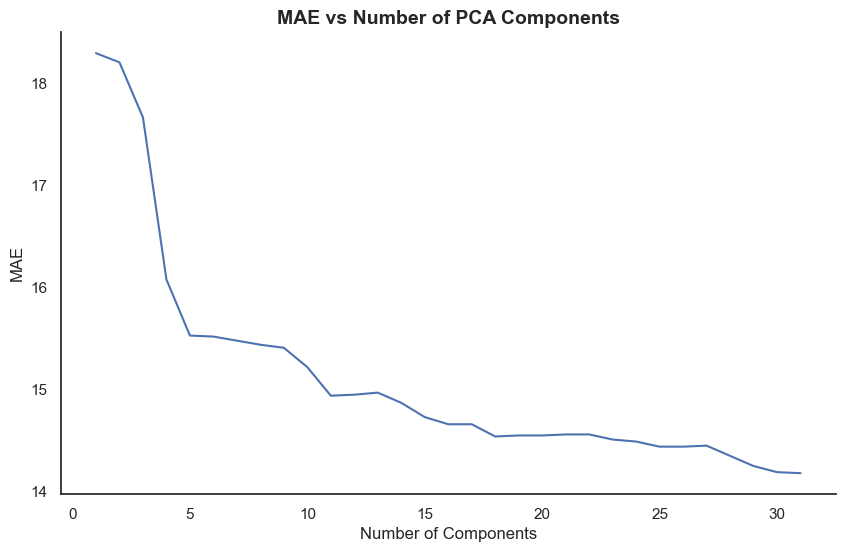

In [39]:
# Creating a plot that shows MAE vs Number of components

plt.figure(figsize = (10, 6))
sns.set_style('white')

plt.title("MAE vs Number of PCA Components", fontsize = 14, weight = 'bold')

plt.xlabel("Number of Components", fontsize = 12)
plt.ylabel("MAE", fontsize = 12)

sns.despine()
plt.plot(N_components,MAE_per_N_components)
plt.show()

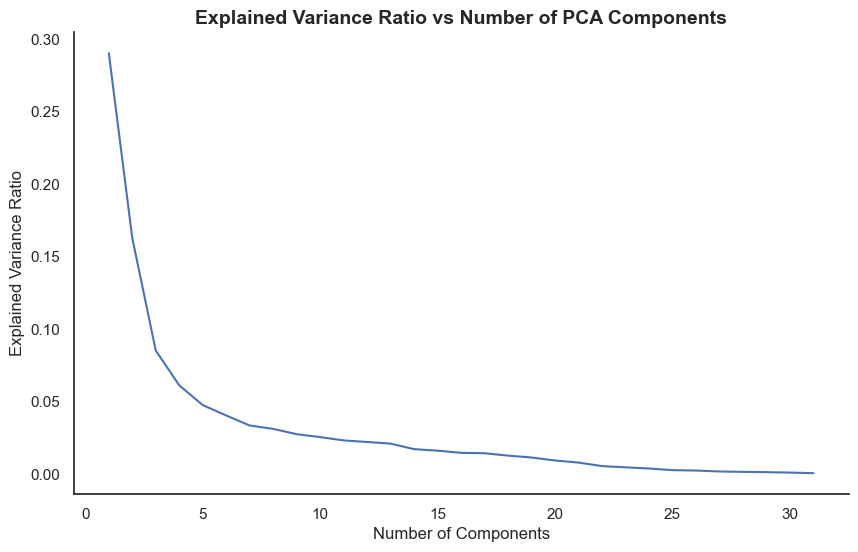

In [40]:
# Creating a plot that shows MAE vs Number of components

plt.figure(figsize = (10, 6))
sns.set_style('white')

plt.title("Explained Variance Ratio vs Number of PCA Components", fontsize = 14, weight = 'bold')

plt.xlabel("Number of Components", fontsize = 12)
plt.ylabel("Explained Variance Ratio", fontsize = 12)

sns.despine()
plt.plot(N_components,explained_variance)
plt.show()

In [41]:
# Creating function that calculates cross-validated scores for the PCA models

def cv_scores_pca(X,Y,n):
        
    cv_MAE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                       scoring='neg_mean_absolute_error', error_score='raise') * (-1)),3)

    cv_MSE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)
    
    cv_MAPE = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='neg_mean_absolute_percentage_error', error_score='raise') * (-100)),3)
    
    cv_R2 = round(np.mean(cross_val_score(LinearRegression(), X, Y, cv=rkf, 
                                          scoring='r2', error_score='raise')),3)
    
    cv_F_stat = round(((cv_R2)/(1-cv_R2))*((len(X) - n - 1 )/n),2)
    
    score_list = [cv_MAE, cv_MSE,cv_MAPE,cv_R2,cv_F_stat,int(n)]
    return score_list

We choose N = 16, 19, 23

In [42]:
n = 16
Y_pc = df1['TARGET_deathRate']
X_pc = df1.drop('TARGET_deathRate', axis = 1)
    
X_pc = scale(X_pc)
    
pca = decomposition.PCA(n_components=n)

X_pc = pca.fit_transform(X_pc)



# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'PCA Model (N = 16)':cv_scores_pca(X_pc,Y_pc,n = 16)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection,VIF Model,PCA Model (N = 16)
MAE,14.192,14.230,14.230,14.230,14.466,14.665
MSE,368.600,371.200,371.200,371.200,381.200,387.600
MAPE,8.203,8.228,8.228,8.228,8.349,8.478
R^2,0.516,0.513,0.513,0.513,0.500,0.491
F-stat,88.190,164.950,164.950,164.950,102.040,160.550
N_Preds,32.000,17.000,17.000,17.000,26.000,16.000


In [43]:
n = 19
Y_pc = df1['TARGET_deathRate']
X_pc = df1.drop('TARGET_deathRate', axis = 1)
    
X_pc = scale(X_pc)
    
pca = decomposition.PCA(n_components=n)

X_pc = pca.fit_transform(X_pc)



# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'PCA Model (N = 19)':cv_scores_pca(X_pc,Y_pc,n = 19)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection,VIF Model,PCA Model (N = 16),PCA Model (N = 19)
MAE,14.192,14.230,14.230,14.230,14.466,14.665,14.547
MSE,368.600,371.200,371.200,371.200,381.200,387.600,383.300
MAPE,8.203,8.228,8.228,8.228,8.349,8.478,8.393
R^2,0.516,0.513,0.513,0.513,0.500,0.491,0.497
F-stat,88.190,164.950,164.950,164.950,102.040,160.550,138.330
N_Preds,32.000,17.000,17.000,17.000,26.000,16.000,19.000


In [44]:
n = 23
Y_pc = df1['TARGET_deathRate']
X_pc = df1.drop('TARGET_deathRate', axis = 1)
    
X_pc = scale(X_pc)
    
pca = decomposition.PCA(n_components=n)

X_pc = pca.fit_transform(X_pc)


# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'PCA Model (N = 23)':cv_scores_pca(X_pc,Y_pc,n = 23)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection,VIF Model,PCA Model (N = 16),PCA Model (N = 19),PCA Model (N = 23)
MAE,14.192,14.230,14.230,14.230,14.466,14.665,14.547,14.512
MSE,368.600,371.200,371.200,371.200,381.200,387.600,383.300,382.500
MAPE,8.203,8.228,8.228,8.228,8.349,8.478,8.393,8.376
R^2,0.516,0.513,0.513,0.513,0.500,0.491,0.497,0.498
F-stat,88.190,164.950,164.950,164.950,102.040,160.550,138.330,114.560
N_Preds,32.000,17.000,17.000,17.000,26.000,16.000,19.000,23.000


In [45]:
n = 27
Y_pc = df1['TARGET_deathRate']
X_pc = df1.drop('TARGET_deathRate', axis = 1)
    
X_pc = scale(X_pc)
    
pca = decomposition.PCA(n_components=n)

X_pc = pca.fit_transform(X_pc)


# Storing the cross-validated scores

CV_RESULTS = pd.concat([CV_RESULTS ,pd.DataFrame({'PCA Model (N = 27)':cv_scores_pca(X_pc,Y_pc,n = 27)},
                                                 index=['MAE','MSE', 'MAPE','R^2','F-stat','N_Preds'])], axis =  1)
CV_RESULTS

,First Run,Forward Selection,Backward Elimination,Stepwise Selection,VIF Model,PCA Model (N = 16),PCA Model (N = 19),PCA Model (N = 23),PCA Model (N = 27)
MAE,14.192,14.230,14.230,14.230,14.466,14.665,14.547,14.512,14.448
MSE,368.600,371.200,371.200,371.200,381.200,387.600,383.300,382.500,381.200
MAPE,8.203,8.228,8.228,8.228,8.349,8.478,8.393,8.376,8.349
R^2,0.516,0.513,0.513,0.513,0.500,0.491,0.497,0.498,0.499
F-stat,88.190,164.950,164.950,164.950,102.040,160.550,138.330,114.560,97.830
N_Preds,32.000,17.000,17.000,17.000,26.000,16.000,19.000,23.000,27.000


## 10. CONCLUSION

As we can see, the best model (error wise) is produced when we use all the predictors from the original dataset. 
However, it is noticeable that the Forward Selection, Backward Elimination and Stepwise Selection methods produce models almost as equal to First Run, with almost half of the original predictors. Also the F-statistic is almost doubled.

In [46]:
len(X2.columns), len(X3.columns), len(X4.columns)

(17, 17, 17)

It is also suspicious that these three methods produce the same metrics with the same number of predictors. Maybe we should check if they use the same data.

In [47]:
X2.equals(X3), X2.equals(X4)

(True, True)

__Saving the Results__

In [48]:
CV_RESULTS.to_csv(r'LinearRegressionModels_CV_Results.csv', index=True, index_label = 'Metric')